In [1656]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [1657]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [1658]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364201 entries, 0 to 1364200
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1364201 non-null  int64  
 1   kWh       1364201 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 20.8 MB


In [1659]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1364196    0.14
1364197    0.14
1364198    0.14
1364199    0.14
1364200    0.14
Name: kWh, Length: 1364201, dtype: float64

In [1660]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1364196    0.14
1364197    0.14
1364198    0.14
1364199    0.14
1364200    0.14
Name: kWh, Length: 1364201, dtype: float64

In [1661]:
l=len(conso_data)-1
l

1364200

In [1662]:
conso_data['sec']=conso_data['Interval']/1000


In [1663]:
conso_data['Wh']=3600000/conso_data['Interval']


In [1664]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [1665]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364201 entries, 0 to 1364200
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1364201 non-null  int64  
 1   kWh        1364201 non-null  float64
 2   sec        1364201 non-null  float64
 3   Wh         1364201 non-null  float64
 4   cumul(ms)  1364201 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 52.0 MB


In [1666]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1364196,25537,0.14,25.537,140.971923,32106597098
1364197,25441,0.14,25.441,141.503872,32106622539
1364198,25069,0.14,25.069,143.603654,32106647608
1364199,25546,0.14,25.546,140.922258,32106673154
1364200,25325,0.14,25.325,142.152024,32106698479


In [1667]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

32106698479000

In [1668]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 19, 18, 2, 118706)

In [1669]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [1670]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

In [1671]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]


In [1672]:
conso_data['dates']

0         2023-08-21 19:18:24.052706
1         2023-08-21 19:18:45.910706
2         2023-08-21 19:19:07.911706
3         2023-08-21 19:19:29.839706
4         2023-08-21 19:19:51.730706
                     ...            
1364196   2024-08-27 09:47:59.216706
1364197   2024-08-27 09:48:24.657706
1364198   2024-08-27 09:48:49.726706
1364199   2024-08-27 09:49:15.272706
1364200   2024-08-27 09:49:40.597706
Name: dates, Length: 1364201, dtype: datetime64[ns]

In [1673]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:18:24.052706,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:18:45.910706,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:19:07.911706,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:19:29.839706,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:19:51.730706,21/08/23
...,...,...,...,...,...,...,...
1364196,25537,0.14,25.537,140.971923,32106597098,2024-08-27 09:47:59.216706,27/08/24
1364197,25441,0.14,25.441,141.503872,32106622539,2024-08-27 09:48:24.657706,27/08/24
1364198,25069,0.14,25.069,143.603654,32106647608,2024-08-27 09:48:49.726706,27/08/24
1364199,25546,0.14,25.546,140.922258,32106673154,2024-08-27 09:49:15.272706,27/08/24


In [1674]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('27/08/24', 27, 8, 2024)

In [1675]:
here = now.strftime('%H:%M:%S')
here

'09:50:20'

In [1676]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [1677]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1287 entries, 1362914 to 1364200
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1287 non-null   int64         
 1   kWh        1287 non-null   float64       
 2   sec        1287 non-null   float64       
 3   Wh         1287 non-null   float64       
 4   cumul(ms)  1287 non-null   int64         
 5   dates      1287 non-null   datetime64[ns]
 6   days       1287 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 80.4+ KB


In [1678]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [1679]:
data = list(df_grp['kWh'])
print(data)


[0.81, 3.7, 4.225, 3.68, 4.184, 4.594, 3.535, 3.425, 3.512, 3.691, 3.744, 3.822, 4.25, 3.783, 3.494, 3.631, 3.324, 3.383, 4.273, 4.009, 4.043, 3.934, 3.449, 4.439, 3.759, 3.761, 4.31, 4.714, 3.829, 3.223, 3.178, 3.985, 3.688, 3.153, 3.788, 4.132, 3.774, 3.581, 4.765, 4.2, 4.534, 3.779, 3.409, 4.308, 3.878, 3.854, 3.444, 4.078, 3.658, 3.4, 4.139, 3.383, 3.88, 3.837, 3.636, 3.76, 4.248, 3.297, 3.877, 2.99, 2.055, 2.042, 2.442, 4.085, 3.721, 4.327, 3.614, 3.93, 3.742, 3.896, 4.006, 4.108, 3.658, 3.153, 3.805, 3.506, 3.628, 3.667, 3.721, 3.249, 3.859, 3.252, 3.795, 3.614, 4.075, 3.565, 3.387, 3.815, 4.062, 4.332, 4.136, 3.998, 4.237, 3.742, 3.928, 3.859, 3.915, 3.735, 4.052, 4.347, 3.885, 3.505, 3.682, 3.668, 3.347, 3.843, 4.004, 4.1, 3.478, 4.175, 3.598, 4.059, 4.552, 3.676, 3.44, 3.579, 4.147, 3.704, 4.093, 3.98, 3.747, 3.59, 5.125, 3.704, 3.765, 4.284, 4.11, 4.688, 4.41, 4.002, 3.758, 4.308, 4.747, 4.185, 4.795, 4.313, 3.733, 4.169, 3.698, 3.664, 3.531, 3.928, 3.687, 3.784, 3.582, 3.488

In [1680]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [1681]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df= conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [1682]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [1683]:
len(df)

1246

In [1684]:
period(p=2)

2024-08-27 08:09:04.653231	2024-08-27 09:31:56.629231	1h 22m 51s 	246


In [1685]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.304366
dtype: float64

In [1686]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.657375
dtype: float64

In [1687]:
last=df_grp.iloc[-1]['kWh']
last

1.287

In [1688]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1287 entries, 1362914 to 1364200
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1287 non-null   int64         
 1   kWh        1287 non-null   float64       
 2   sec        1287 non-null   float64       
 3   Wh         1287 non-null   float64       
 4   cumul(ms)  1287 non-null   int64         
 5   dates      1287 non-null   datetime64[ns]
 6   days       1287 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 80.4+ KB


In [1689]:
# select day
day = today
#day = '16/08/24'


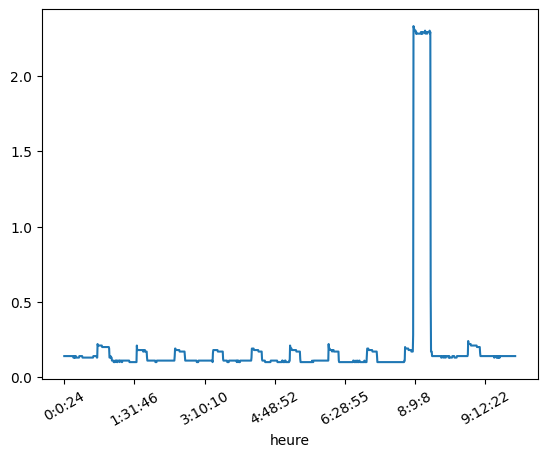

In [1690]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [1691]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 12/08/24 4.379
Min : 28/07/24 2.882


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1362914,26081,0.14,26.081,138.031517,32071342479,2024-08-27 00:00:24.597706,27/08/24,0:0:24
1362915,25518,0.14,25.518,141.076887,32071367997,2024-08-27 00:00:50.115706,27/08/24,0:0:50
1362916,25645,0.14,25.645,140.378241,32071393642,2024-08-27 00:01:15.760706,27/08/24,0:1:15
1362917,26277,0.14,26.277,137.001941,32071419919,2024-08-27 00:01:42.037706,27/08/24,0:1:42
1362918,26386,0.14,26.386,136.435989,32071446305,2024-08-27 00:02:08.423706,27/08/24,0:2:8
...,...,...,...,...,...,...,...,...
1364196,25537,0.14,25.537,140.971923,32106597098,2024-08-27 09:47:59.216706,27/08/24,9:47:59
1364197,25441,0.14,25.441,141.503872,32106622539,2024-08-27 09:48:24.657706,27/08/24,9:48:24
1364198,25069,0.14,25.069,143.603654,32106647608,2024-08-27 09:48:49.726706,27/08/24,9:48:49
1364199,25546,0.14,25.546,140.922258,32106673154,2024-08-27 09:49:15.272706,27/08/24,9:49:15


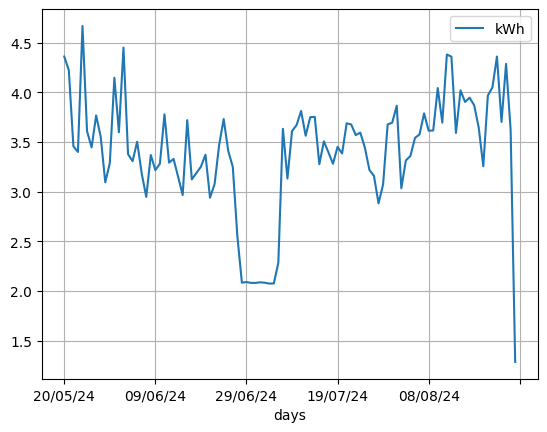

In [1692]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2024-08-27 00:00:24.597706	2024-08-27 08:09:06.923706	8h 8m 42s 	1000
2024-08-27 08:09:06.923706	2024-08-27 09:49:40.597706	1h 40m 33s 	287
<class 'pandas.core.frame.DataFrame'>
Index: 1287 entries, 1362914 to 1364200
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1287 non-null   int64         
 1   kWh        1287 non-null   float64       
 2   sec        1287 non-null   float64       
 3   Wh         1287 non-null   float64       
 4   cumul(ms)  1287 non-null   int64         
 5   dates      1287 non-null   datetime64[ns]
 6   days       1287 non-null   object        
 7   heure      1287 non-null   object        
 8   hours      1287 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 100.5+ KB


('27/08/24', <Axes: xlabel='hours'>)

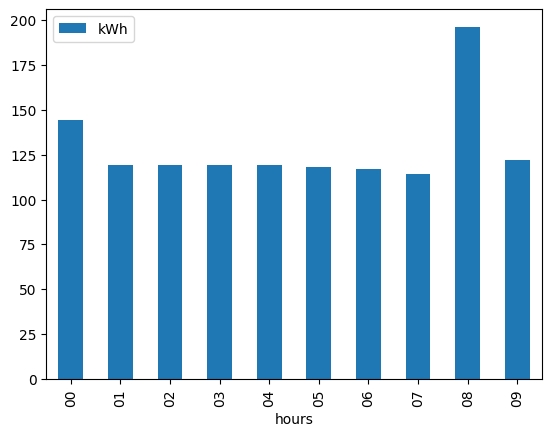

In [1693]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [1694]:
df_grp

,kWh
days,
21/08/23,0.810
22/08/23,3.700
23/08/23,4.225
24/08/23,3.680
25/08/23,4.184
...,...
23/08/24,4.359
24/08/24,3.701
25/08/24,4.286


In [1695]:
# select number of days to display
span = 30
#df_grp.tail(span)


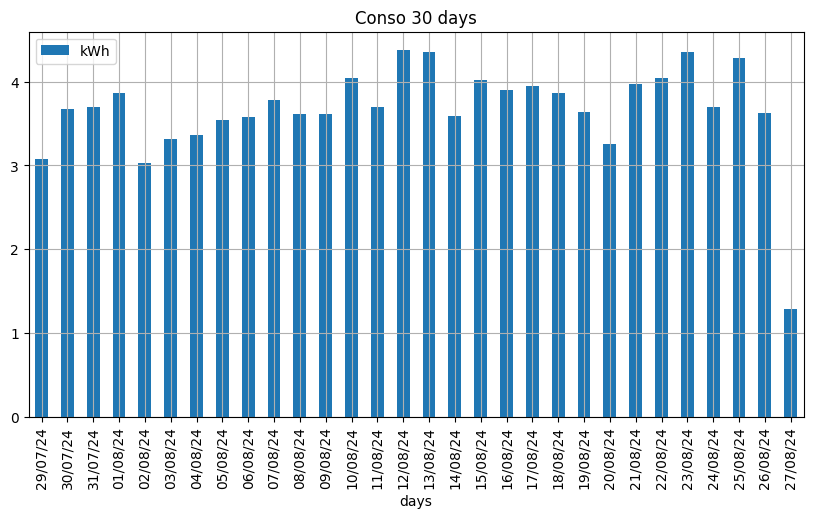

In [1696]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


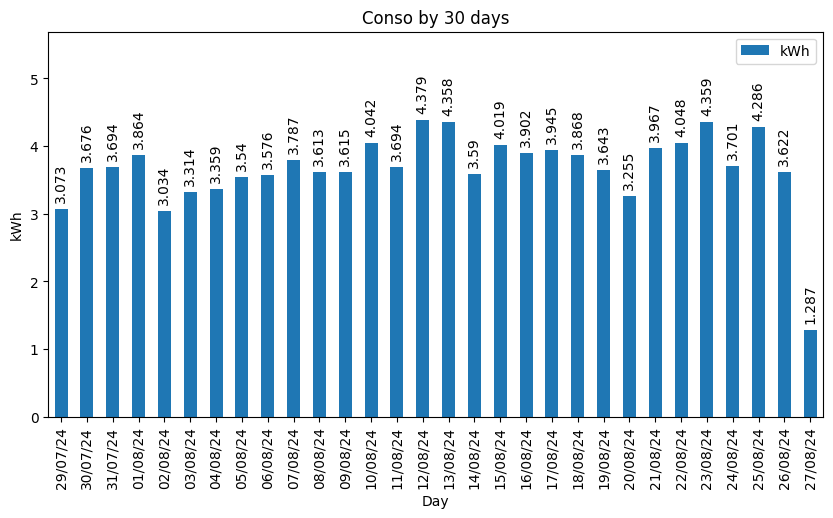

In [1697]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [1698]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
29/07/24    3.073
30/07/24    3.676
31/07/24    3.694
01/08/24    3.864
02/08/24    3.034
03/08/24    3.314
04/08/24    3.359
05/08/24    3.540
06/08/24    3.576
07/08/24    3.787
08/08/24    3.613
09/08/24    3.615
10/08/24    4.042
11/08/24    3.694
12/08/24    4.379
13/08/24    4.358
14/08/24    3.590
15/08/24    4.019
16/08/24    3.902
17/08/24    3.945
18/08/24    3.868
19/08/24    3.643
20/08/24    3.255
21/08/24    3.967
22/08/24    4.048
23/08/24    4.359
24/08/24    3.701
25/08/24    4.286
26/08/24    3.622
27/08/24    1.287
Name: kWh, dtype: float64

In [1699]:
x_labels=df_grp.tail(span).index
x_labels

Index(['29/07/24', '30/07/24', '31/07/24', '01/08/24', '02/08/24', '03/08/24',
       '04/08/24', '05/08/24', '06/08/24', '07/08/24', '08/08/24', '09/08/24',
       '10/08/24', '11/08/24', '12/08/24', '13/08/24', '14/08/24', '15/08/24',
       '16/08/24', '17/08/24', '18/08/24', '19/08/24', '20/08/24', '21/08/24',
       '22/08/24', '23/08/24', '24/08/24', '25/08/24', '26/08/24', '27/08/24'],
      dtype='object', name='days')

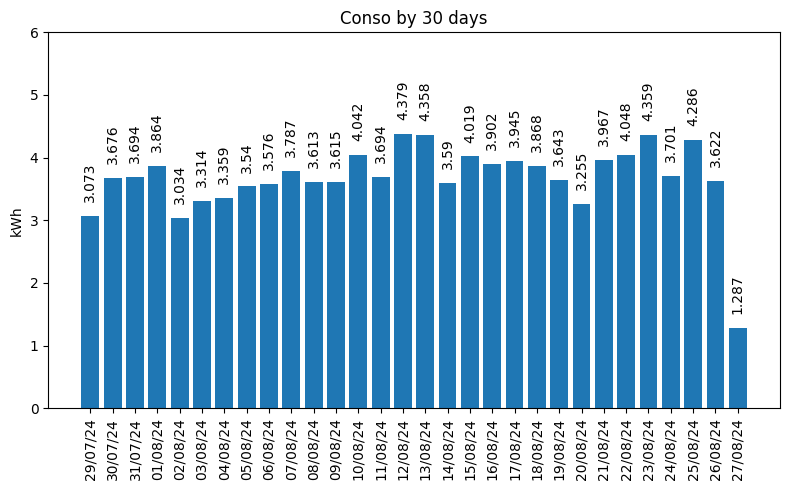

In [1700]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [1701]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

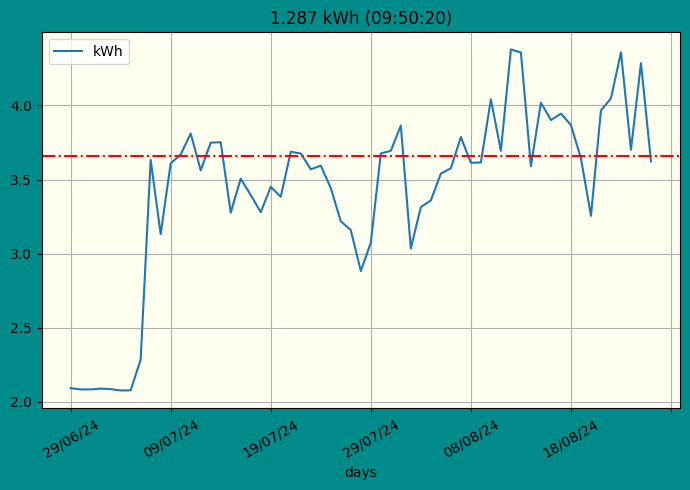

In [1702]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

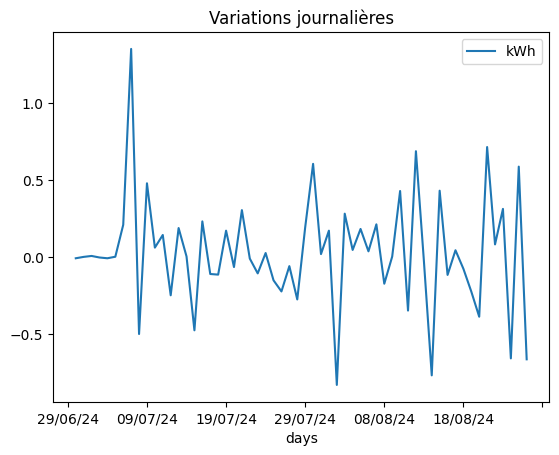

In [1703]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [1704]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:18:24.052706,21/08/23,19
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:18:45.910706,21/08/23,19
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:19:07.911706,21/08/23,19
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:19:29.839706,21/08/23,19
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:19:51.730706,21/08/23,19
...,...,...,...,...,...,...,...,...
1364196,25537,0.14,25.537,140.971923,32106597098,2024-08-27 09:47:59.216706,27/08/24,09
1364197,25441,0.14,25.441,141.503872,32106622539,2024-08-27 09:48:24.657706,27/08/24,09
1364198,25069,0.14,25.069,143.603654,32106647608,2024-08-27 09:48:49.726706,27/08/24,09
1364199,25546,0.14,25.546,140.922258,32106673154,2024-08-27 09:49:15.272706,27/08/24,09


In [1705]:

# group all by day for all conso_days
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
groupallbyday.tail()


,days,hours,kWh
124,21/08/23,19,0.16
125,21/08/23,19,0.16
126,21/08/23,19,0.16
127,21/08/23,19,0.16
128,21/08/23,19,0.16
...,...,...,...
1364196,27/08/24,09,0.14
1364197,27/08/24,09,0.14
1364198,27/08/24,09,0.14
1364199,27/08/24,09,0.14


In [1706]:
grp_by_day = groupallbyday.count()
grp_by_day

kWh
days     hours     
21/08/23 19     129
         20     280
         21     141
         22     130
         23     130
...             ...
27/08/24 05     118
         06     117
         07     114
         08     196
         09     122

[8919 rows x 1 columns]

In [1707]:
grp_by_day['cumsum'] = grp_by_day.groupby(level=0)['kWh'].cumsum()
grp_by_day['diff'] = grp_by_day.groupby(level=0)['kWh'].diff()
# or
grp_by_day['cumsum'] = grp_by_day.groupby(['days'])['kWh'].cumsum()
grp_by_day['diff'] = grp_by_day.groupby(['days'])['kWh'].diff()
grp_by_day

kWh  cumsum   diff
days     hours                    
21/08/23 19     129     129    NaN
         20     280     409  151.0
         21     141     550 -139.0
         22     130     680  -11.0
         23     130     810    0.0
...             ...     ...    ...
27/08/24 05     118     738   -1.0
         06     117     855   -1.0
         07     114     969   -3.0
         08     196    1165   82.0
         09     122    1287  -74.0

[8919 rows x 3 columns]

Text(0.5, 1.0, 'Cumul journalier')

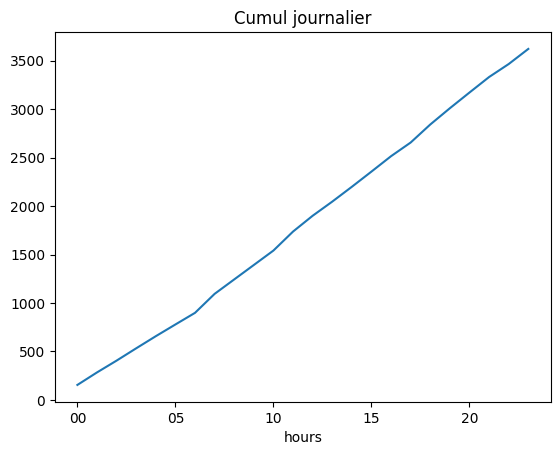

In [1708]:
# progression sans surprise
grp_by_day.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

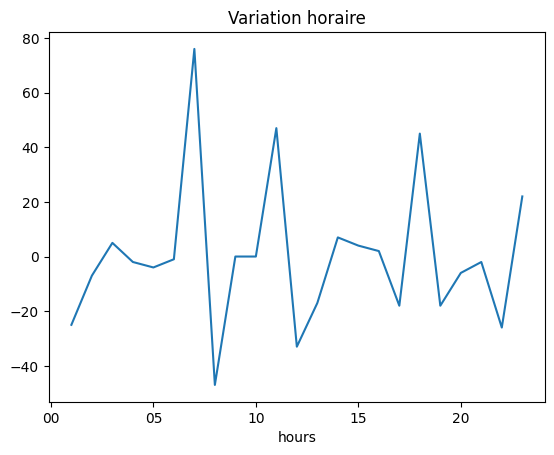

In [1709]:
# plus parlant
grp_by_day.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [1710]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_day.index.levels[0].unique())
# or
n = len(grp_by_day.index.levels[0])
# or
n = grp_by_day.index.levshape[0]  # levshape -> (371,24)
n

373

Text(0.5, 1.0, '373 days')

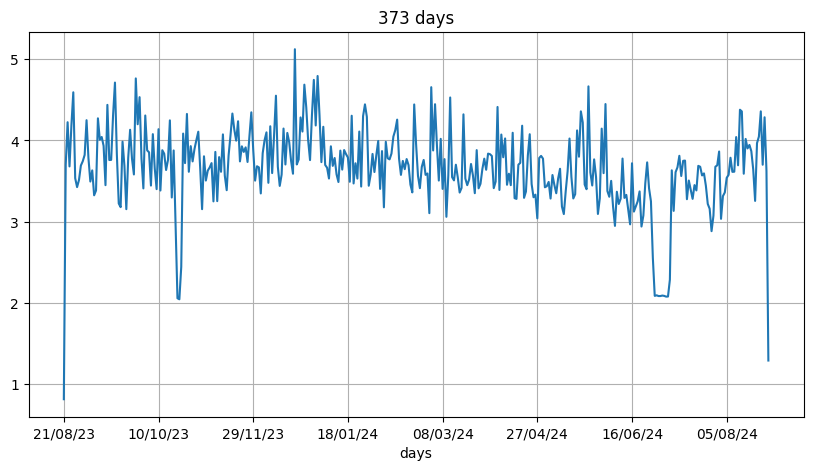

In [1711]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '27/08/24')

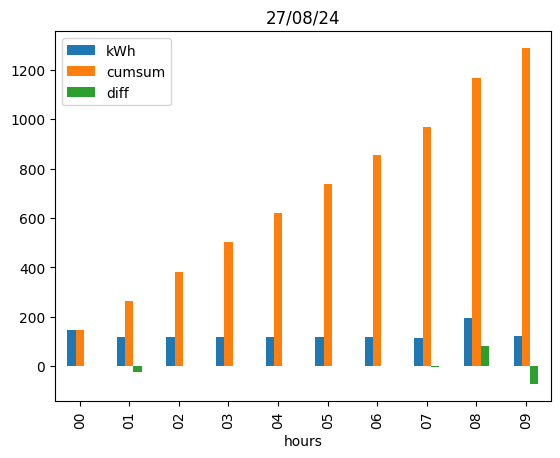

In [1712]:
# select a day to plot
day = '02/07/24'
day = today
grp_by_day.loc[day].plot.bar()
plt.title(f'{day}')

# Conso du jour


In [1713]:
groupedbyhour.count()

,kWh
hours,
00,144
01,119
02,119
03,119
04,119
05,118
06,117
07,114
08,196


In [1714]:
day = '26/08/24'
day = today
grp_by_day.loc[today].kWh

hours
00    144
01    119
02    119
03    119
04    119
05    118
06    117
07    114
08    196
09    122
Name: kWh, dtype: int64

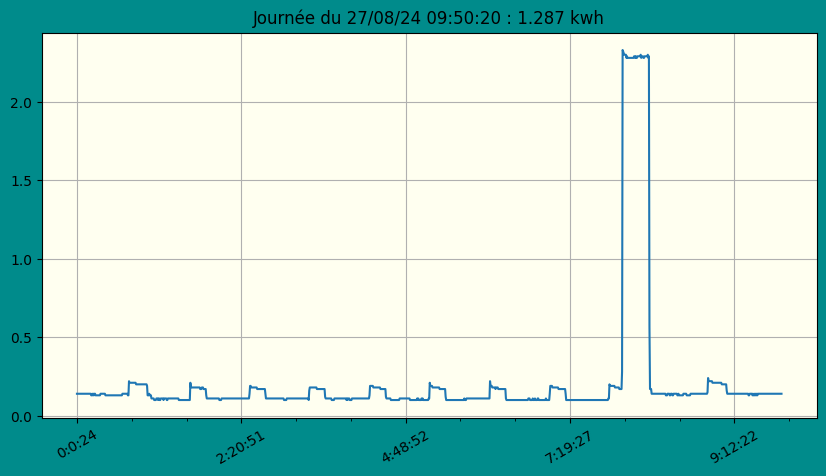

In [1715]:

show(day,bgcolor='ivory')


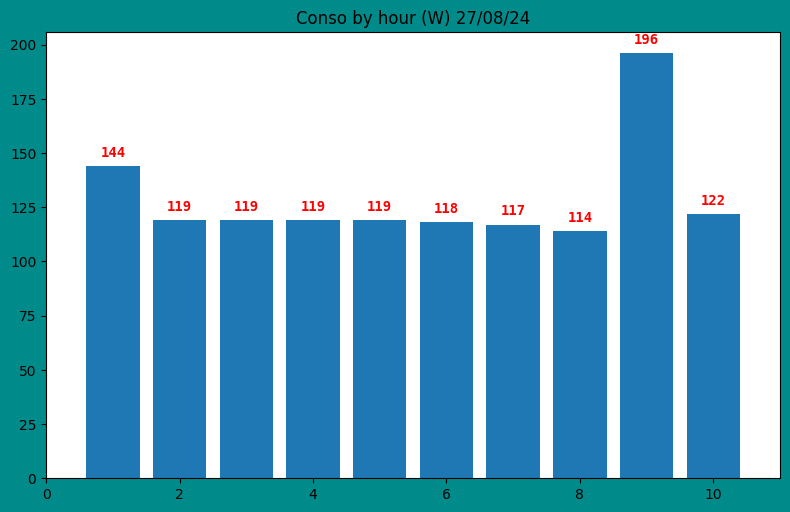

In [1716]:
# conso by hour
#data = groupedbyhour.count().kWh
data = grp_by_day.loc[day].kWh

# len(groupedbyhour)
x = np.arange(1,len(data)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

plt.bar(x,data)
#plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {today}')
plt.xlim(0,len(x)+1)
#plt.xticks(rotation=30);
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


In [1717]:
diff = grp_by_day.loc[day]
diff

,kWh,cumsum,diff
hours,,,
00,144,144,NaN
01,119,263,-25.0
02,119,382,0.0
03,119,501,0.0
04,119,620,0.0
05,118,738,-1.0
06,117,855,-1.0
07,114,969,-3.0
08,196,1165,82.0


<BarContainer object of 10 artists>

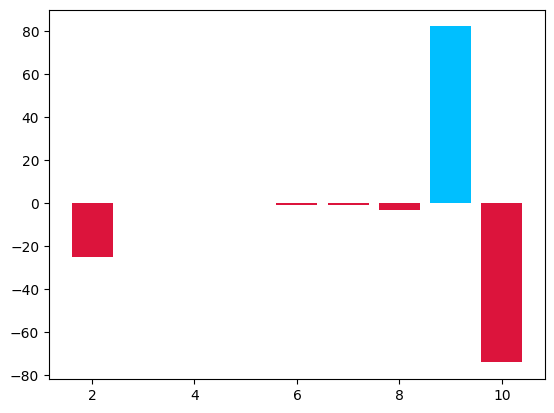

In [1718]:
xx = np.arange(1,len(diff)+1)
plt.bar(x,diff['diff'],
 color=np.where(diff['diff'] > 0, 'deepskyblue', 'crimson'))

<Axes: xlabel='hours'>

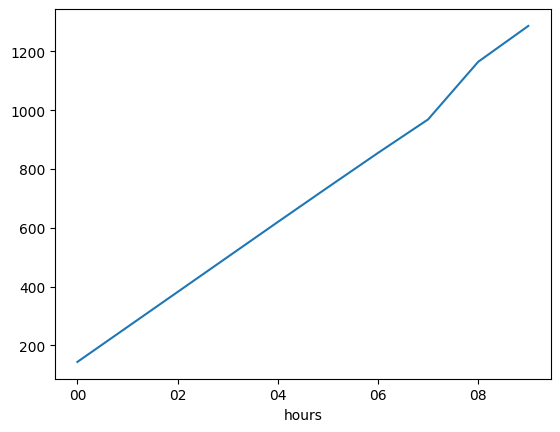

In [1719]:
data.cumsum().plot()

In [1720]:
data.diff()

hours
00     NaN
01   -25.0
02     0.0
03     0.0
04     0.0
05    -1.0
06    -1.0
07    -3.0
08    82.0
09   -74.0
Name: kWh, dtype: float64

<Axes: xlabel='hours'>

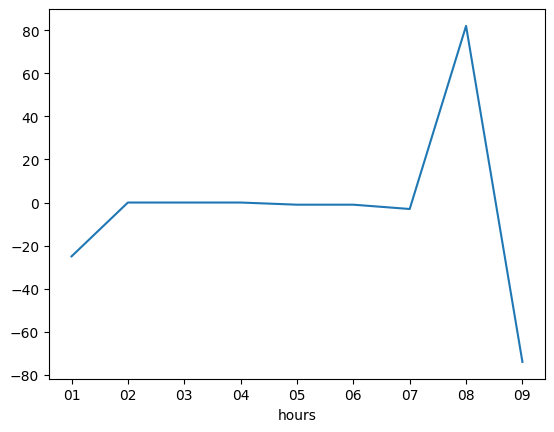

In [1721]:
data.diff().plot()

# Test

In [1722]:
import os
os.listdir(path='.')

['.git',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipynb',
 'date_for

In [1723]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [1724]:
#conso_byhour(day)

In [1725]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

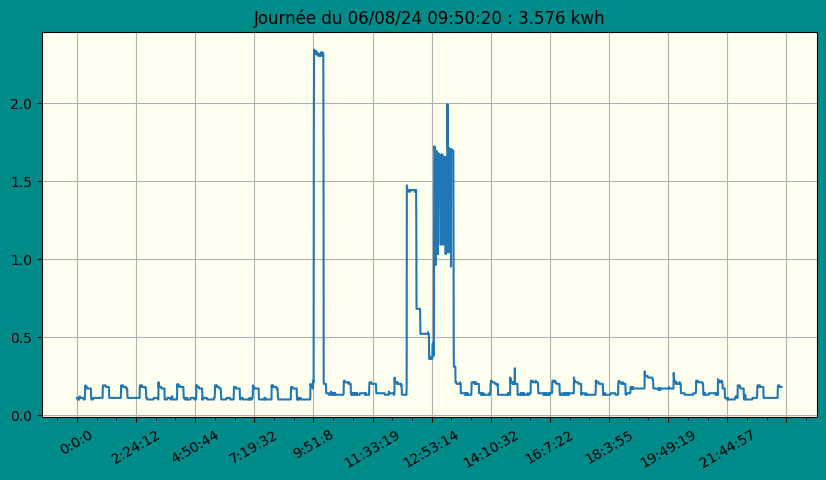

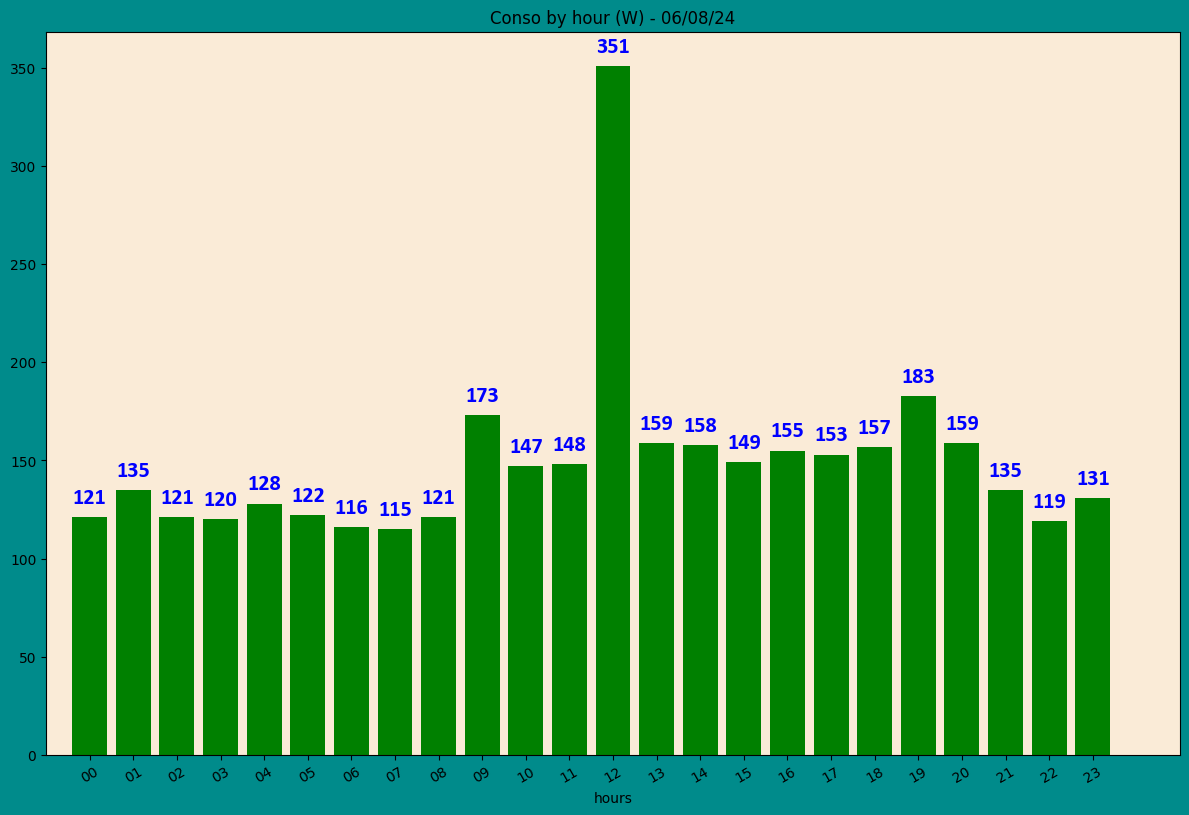

In [1726]:
# plot any day
day = '06/08/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [1727]:
month

days
28/07/24    2.882
29/07/24    3.073
30/07/24    3.676
31/07/24    3.694
01/08/24    3.864
02/08/24    3.034
03/08/24    3.314
04/08/24    3.359
05/08/24    3.540
06/08/24    3.576
07/08/24    3.787
08/08/24    3.613
09/08/24    3.615
10/08/24    4.042
11/08/24    3.694
12/08/24    4.379
13/08/24    4.358
14/08/24    3.590
15/08/24    4.019
16/08/24    3.902
17/08/24    3.945
18/08/24    3.868
19/08/24    3.643
20/08/24    3.255
21/08/24    3.967
22/08/24    4.048
23/08/24    4.359
24/08/24    3.701
25/08/24    4.286
26/08/24    3.622
Name: kWh, dtype: float64

In [1728]:
month.idxmax()

'12/08/24'

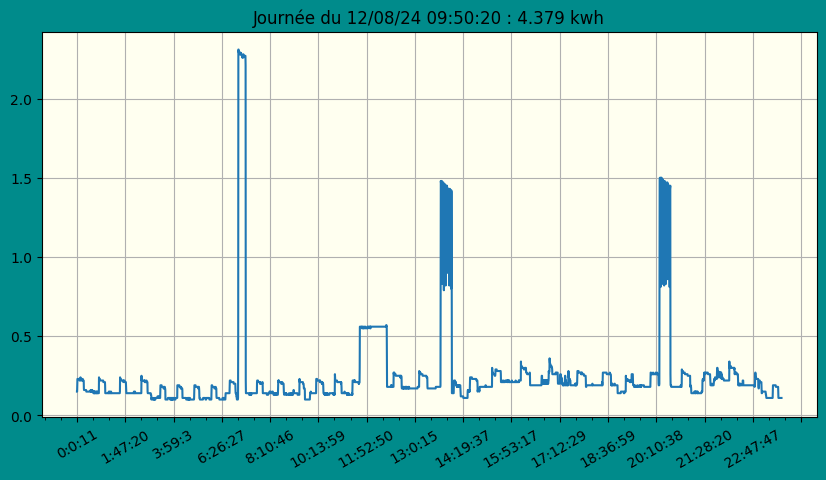

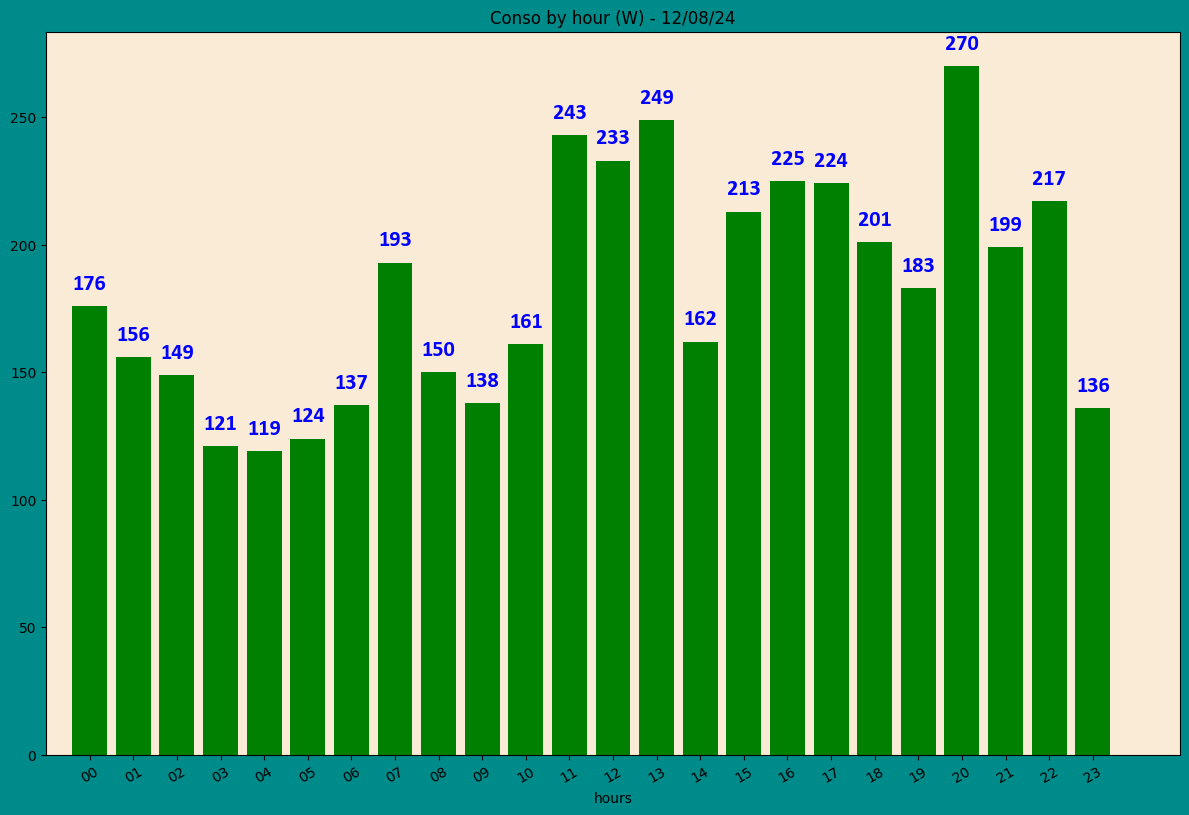

In [1729]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [1730]:
filename='conso_data.csv'
#conso_data.to_csv(filename)